In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# extract data 
md=pd.read_csv('medical_examination.csv')

In [3]:
# view the data
md.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# add an overweight column with its values being derived from BMI

md['overweight']=(md['weight']/(md['height']/100)**2)

In [5]:
# view the data
md.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [6]:
# then covert it to a function making 1 = overweight and 0 = normal
md['overweight']=md['overweight'].apply(lambda x:1 if x > 25 else 0 )


In [7]:
# Normalize the data by making 0 always good and 1 always bad 
md['cholesterol']=md['cholesterol']. apply(lambda x:0 if x==1 else 1)
md['gluc']= md['gluc'].apply(lambda x:0 if x==1 else 1 )

In [8]:
# view the data
md.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [9]:
# Convert the data into long format  
md_cat=pd.melt(md, id_vars='cardio', value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

In [10]:
md_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [11]:
# create a new column which will be were the value counts will be placed 
md_cat['total']=1

In [12]:
md_cat

,cardio,variable,value,total
0,0,cholesterol,0,1
1,1,cholesterol,1,1
2,1,cholesterol,1,1
3,1,cholesterol,0,1
4,0,cholesterol,0,1
...,...,...,...,...
419995,0,overweight,1,1
419996,1,overweight,1,1
419997,1,overweight,1,1
419998,1,overweight,1,1


In [13]:
# groupby and also request the count, but ensure the data remains indexed 
md_cat=md_cat.groupby(['cardio','variable','value'], as_index= False).count()

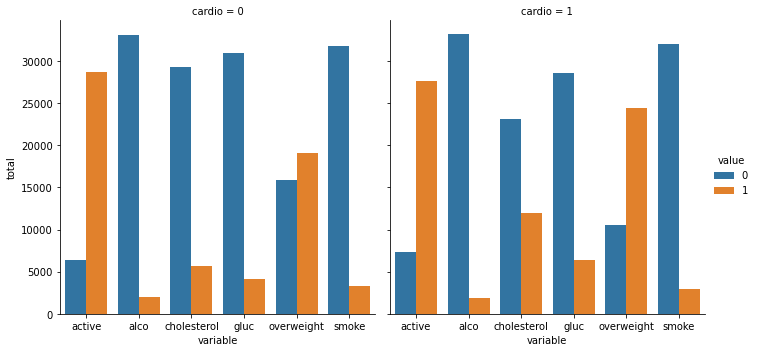

In [14]:
# plot seaborn cat plot
sns.catplot(x='variable', y= 'total', hue = 'value', col= 'cardio', data= md_cat, kind='bar')

<AxesSubplot:xlabel='weight', ylabel='height'>

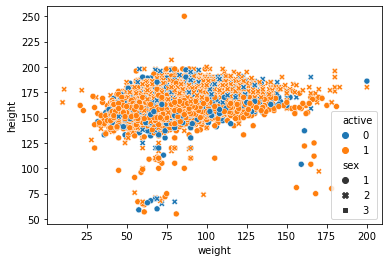

In [15]:
# this shows us there are alot of outliers in the data
sns.scatterplot( x = "weight",  y = "height", data = md, hue = "active",style='sex')


In [16]:
# Clean the data. Filter out the following patient segments that represent incorrect data
md_heat= md[(md['ap_lo'] <= md['ap_hi'])&
       (md['height']>=md['height'].quantile(0.025))&
       (md['height']<=md['height'].quantile(0.975))&
       (md['weight']>=md['weight'].quantile(0.025))&
       (md['weight']>=md['weight'].quantile(0.975))]

In [17]:
# Create a correlation matrix using the dataset
md_corr=md_heat.corr(method="pearson")

In [18]:
md_corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.009119,0.032996,0.040188,-0.010094,-0.011924,0.019531,0.021982,0.031237,-0.016015,0.018193,0.002541,0.019083,NaN
age,0.009119,1.000000,-0.024524,-0.085452,-0.080292,0.139159,0.047289,0.091663,0.100700,-0.130715,-0.043589,0.008563,0.134979,NaN
sex,0.032996,-0.024524,1.000000,0.696119,-0.002565,0.014296,0.037500,-0.059527,-0.021234,0.318467,0.195705,-0.020537,0.040138,NaN
height,0.040188,-0.085452,0.696119,1.000000,0.060698,0.023950,0.045187,-0.040383,-0.022685,0.259846,0.149035,-0.008849,0.046905,NaN
weight,-0.010094,-0.080292,-0.002565,0.060698,1.000000,0.049371,0.071416,-0.018955,0.027514,-0.005951,0.020763,0.040971,0.000784,NaN
ap_hi,-0.011924,0.139159,0.014296,0.023950,0.049371,1.000000,0.688365,0.086951,0.089894,0.015457,0.063410,-0.022970,0.283093,NaN
ap_lo,0.019531,0.047289,0.037500,0.045187,0.071416,0.688365,1.000000,0.073715,0.067866,-0.012735,0.046541,-0.015288,0.228717,NaN
cholesterol,0.021982,0.091663,-0.059527,-0.040383,-0.018955,0.086951,0.073715,1.000000,0.378083,0.052428,0.082548,-0.004535,0.123193,NaN
gluc,0.031237,0.100700,-0.021234,-0.022685,0.027514,0.089894,0.067866,0.378083,1.000000,0.086194,0.103028,-0.027506,-0.015594,NaN
smoke,-0.016015,-0.130715,0.318467,0.259846,-0.005951,0.015457,-0.012735,0.052428,0.086194,1.000000,0.295272,-0.041742,0.017602,NaN


In [19]:
# Generate a mask for the upper triangle
mask=np.triu(md_corr)

<AxesSubplot:>

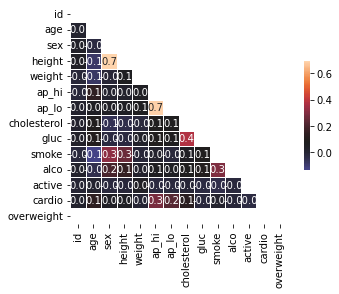

In [20]:
sns.heatmap(md_corr, linewidth=1, mask=mask, annot= True, square= True, fmt='.1f', center= 0.08,cbar_kws={"shrink":0.5})